In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
#from gmr_ import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval


save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

***

In [2]:
fits_path = "../data/cubes/Orion.methanol.cbc.contsub.image.fits"
data,wcs,hdu,freq = load_data(fits_path)
#data,wcs,hdu = load_data(fits_path)

print(wcs)
print("\nShape of array:", data.shape)

/Users/martin/anaconda3/lib/python3.6/site-packages/spectral_cube/cube_utils.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  stokes_arrays[stokes_names[i_stokes]] = array[array_slice]


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  
CRVAL : 83.80979166667  -5.376388888889  229763161321.4  
CRPIX : 51.0  51.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0001111111111111  0.0001111111111111  -488336.1207886  
NAXIS : 100  100  41

Shape of array: (41, 100, 100)


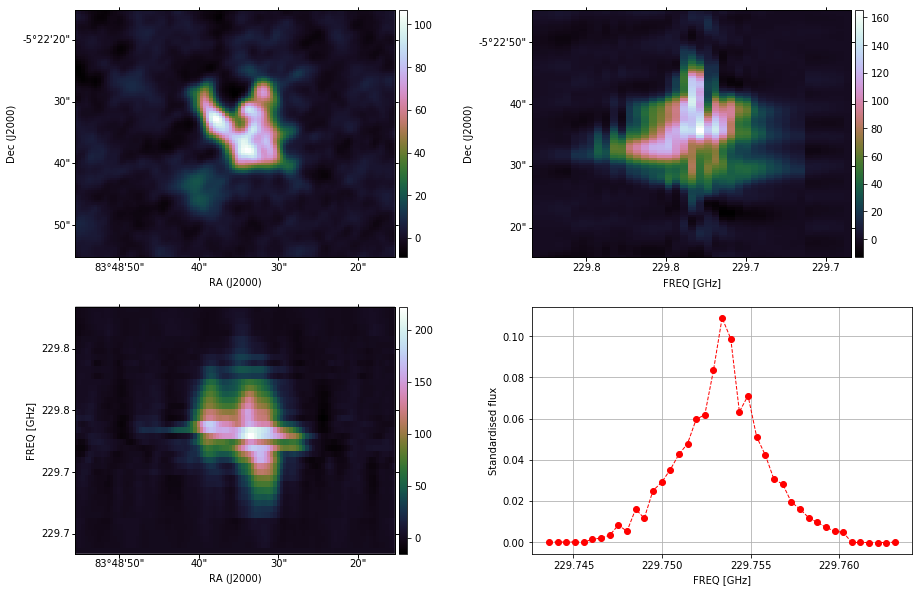

In [3]:
#cube_plot(data, wcs=wcs, freq=freq, unit=hdu.header["BUNIT"])
cube_plot(data, wcs=wcs, freq=freq)

In [4]:
%%prun -s tottime -q -l 30 -T gmr_v0_prof
tic = time.time()
rms = estimate_rms(data)
hdmc = HDMClouds(data, freq=freq, back_level=rms, wcs=wcs, verbose=False, n_gaussians=500)
tac = time.time()
print((tac-tic)/60.)

[INFO] Number of pixels with significant emission: 17411
[INFO] Level of compression: 2.8717477456780194%
[INFO] Number of ICEs: 3
Isolated Cloud Entity A: 17264 pixels of significant emission.
Isolated Cloud Entity B: 117 pixels of significant emission.
Isolated Cloud Entity C: 30 pixels of significant emission.
0.6395488818486531
 
*** Profile printout saved to text file 'gmr_v0_prof'. 


--------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


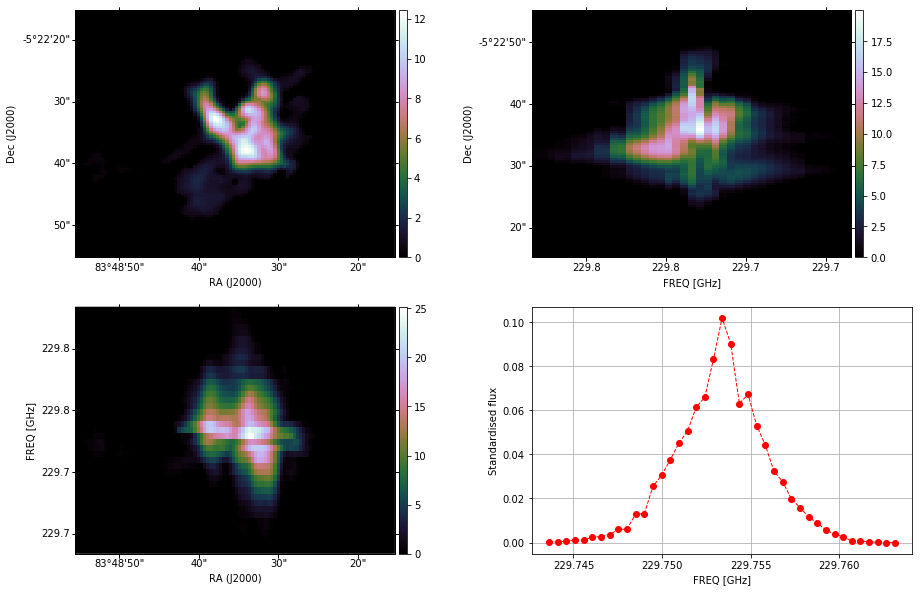

--------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


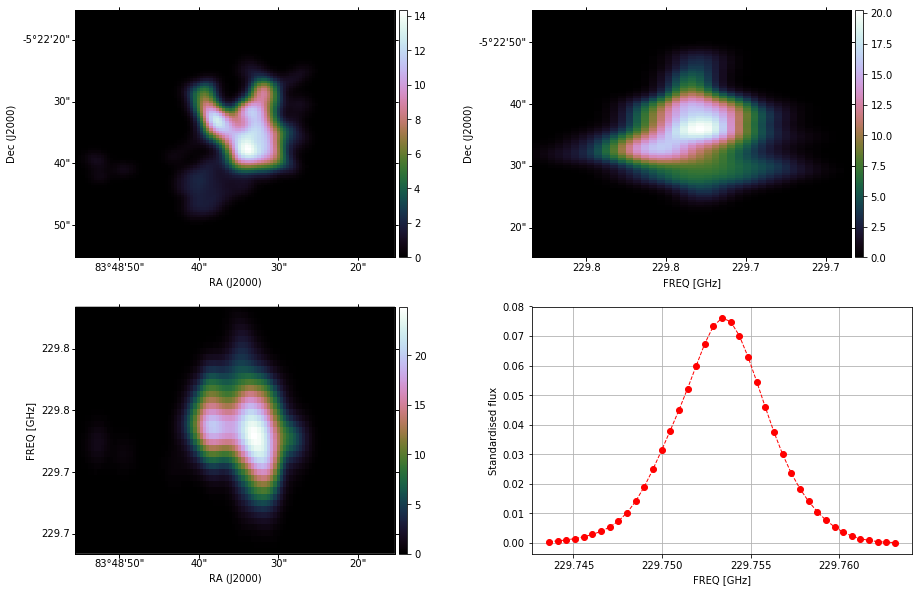

--------------------------------------------------------------------------------------------------------------
RESIDUAL


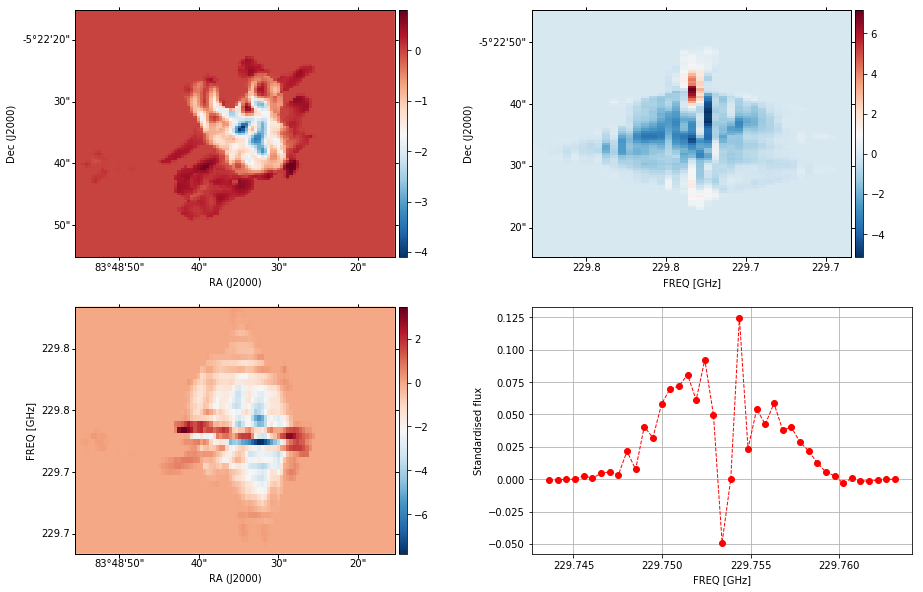

--------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.021118647971268854
Inf norm of residual: 0.40635105182832926
Variance of residual: 0.00044278221595951385
Normalized flux addition: 0.1903100631701918
Normalized flux lost: 0.059417147004162084


In [5]:
hdmc.get_residual_stats();

***

## Profiling Results

In [6]:
# with k_sig=2
print(open('gmr_v0_prof', 'r').read())

         12143646 function calls (12094403 primitive calls) in 38.347 seconds

   Ordered by: internal time
   List reduced from 2347 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       20    6.643    0.332    6.723    0.336 {method 'query_radius' of 'sklearn.neighbors.ball_tree.BinaryTree' objects}
    16910    4.834    0.000    4.834    0.000 gmr.py:211(least_dissimilar)
    16910    4.576    0.000    4.576    0.000 gmr.py:286(update_structs)
    16862    3.794    0.000    7.611    0.000 gmr.py:263(radius_search)
       20    2.715    0.136    2.715    0.136 {built-in method numpy.core.multiarray.concatenate}
        6    1.373    0.229   24.786    4.131 gmr.py:330(reduce_mixture)
  1658443    1.323    0.000    2.345    0.000 shape_base.py:11(atleast_1d)
  1811724    0.846    0.000    0.846    0.000 {built-in method numpy.core.multiarray.array}
    33828    0.820    0.000    1.156    0.000 function_base.py:4065(delete)
       

## GM parameters optimization

In [7]:
%%prun -s tottime -q -l 30 -T gma_prof
hdmc.build_gmr()

---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.06033160839753787
Inf norm of residual: 0.3503144693577586
Variance of residual: 0.0034337344871374484
Normalized flux addition: 0.08645718193755192
Normalized flux lost: 0.042192991494243944


---------------------------------------------
Building GM for Isolated Cloud Entity B
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.016139735631288846
Inf norm of residual: 0.048436397804858936
Variance of residual: 0.00023923850322750856
Normalized flux addition: 0.07818245407606406
Normalized flux lost: 0.03694153363472403


---------------------------------------------
Building GM for Isolated Cloud Entity C
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.011756708275608726
Inf norm of residual: 0.025023244823528593
Variance of residual: 0.0001223764564229971
Norma

--------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


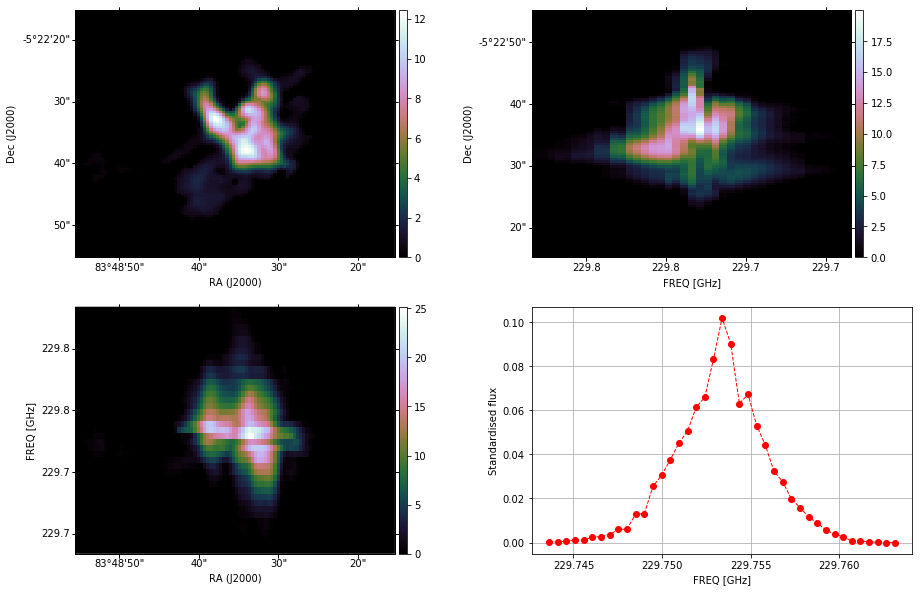

--------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


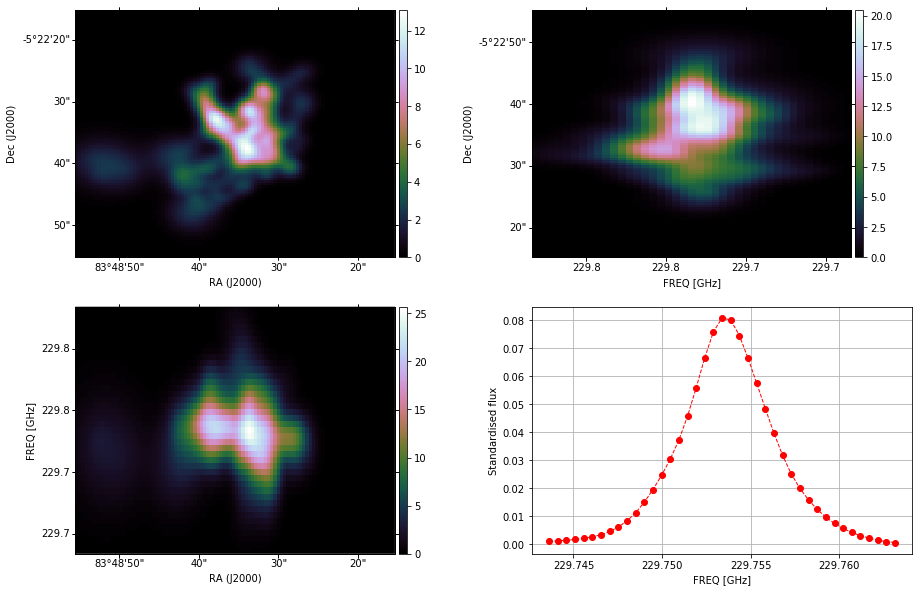

--------------------------------------------------------------------------------------------------------------
RESIDUAL


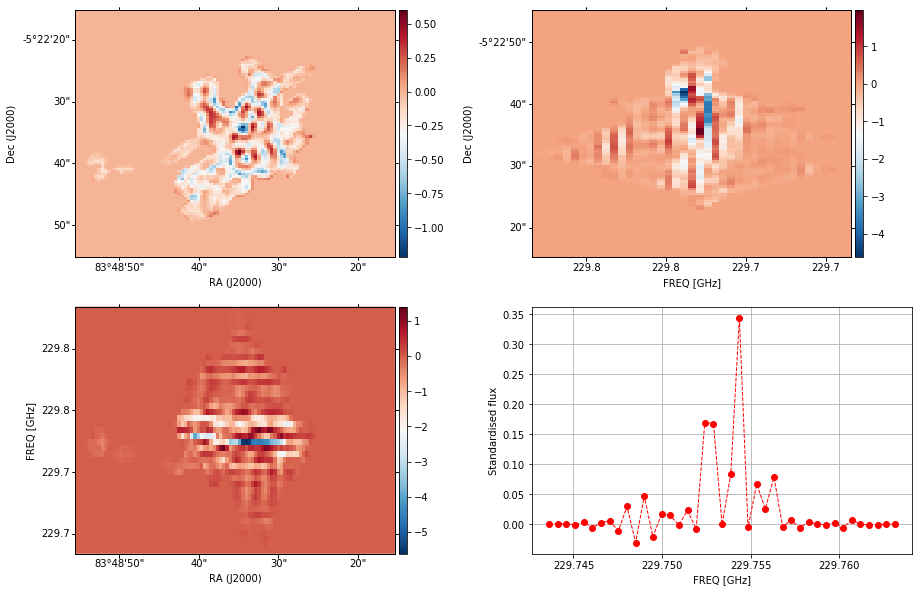

--------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.01240542103751945
Inf norm of residual: 0.3503178592814254
Variance of residual: 0.00015351283770007905
Normalized flux addition: 0.08717610602048682
Normalized flux lost: 0.04207951553267334


In [8]:
hdmc.get_residual_stats(plot=True);

***

In [9]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 1011.3162288665771


In [10]:
w,sig = hdmc.get_params()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.3890649543804453
sig variation:  0.049459192672454994


In [11]:
print(open('gma_prof', 'r').read())

         795420 function calls in 1011.316 seconds

   Ordered by: internal time
   List reduced from 113 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   198522  804.722    0.004  804.722    0.004 {fgm_eval.gm_eval3d_2}
        3  188.418   62.806 1011.238  337.079 {built-in method scipy.optimize._minpack._lmdif}
   198519   11.150    0.000  822.829    0.004 hdmclouds_v1.py:965(F)
   198525    6.870    0.000    6.870    0.000 utils.py:132(sig_mapping)
   198541    0.150    0.000    0.150    0.000 {built-in method builtins.len}
       62    0.001    0.000    0.001    0.000 socket.py:334(send)
        4    0.001    0.000    0.001    0.000 {built-in method numpy.core.multiarray.dot}
        3    0.001    0.000    0.066    0.022 hdmclouds_v1.py:893(get_residual_stats)
        1    0.001    0.001 1011.316 1011.316 hdmclouds_v1.py:441(build_gmr)
        5    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.conca

***

In [ ]:
hdmc.build_hierarchical_tree()

In [15]:
hdmc.visualize()

interactive(children=(Text(value='', description='split'), Text(value='', description='join1'), Text(value='',…

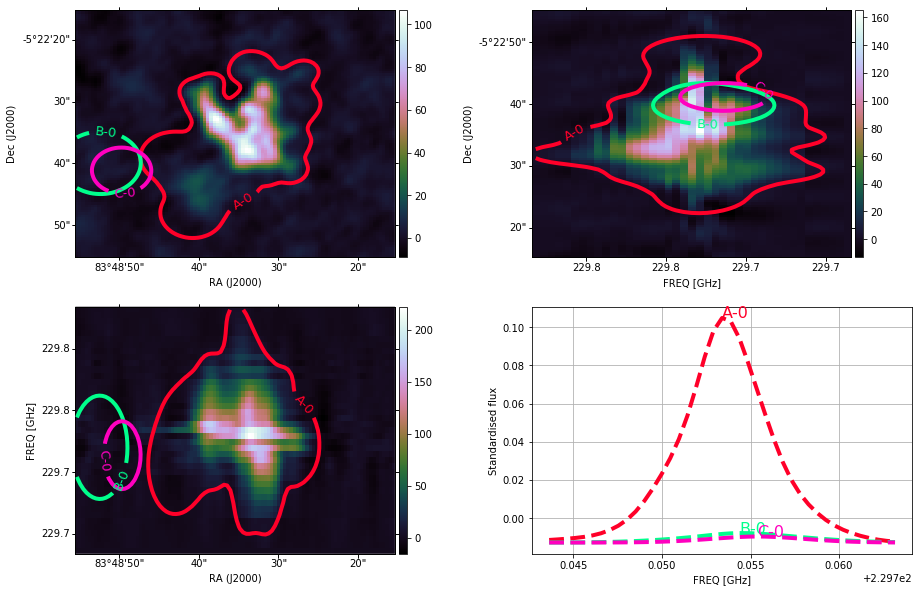

In [16]:
ce_plot_3d(hdmc, wcs=hdmc.wcs)

***

In [118]:
hdmc.compute_stats()

,Flux [Jy/Beam],Right Ascension,Declination,Frequency
A-2,905.518147,83deg48m38.692s,-5deg22m46.4864s,229.73700 GHz
A-3,107.511642,83deg48m31.5708s,-5deg22m47.1048s,229.73480 GHz
A-5,347.523523,83deg48m33.6951s,-5deg22m47.8597s,229.74145 GHz
B-0,1.724389,83deg48m40.6735s,-5deg22m46.116s,229.76007 GHz
C-0,0.919424,83deg48m41.3178s,-5deg22m45.4144s,229.75599 GHz


## Again with bigger number of centers: `750`

In [11]:
%%prun -s tottime -q -l 30 -T gmr_v0_prof
rms = estimate_rms(data)
hdmc = HDMClouds(data, bak_level=rms, wcs=wcs, verbose=False, n_center=750)

[INFO] Number of usable pixels: 17411
 
*** Profile printout saved to text file 'gmr_v0_prof'. 


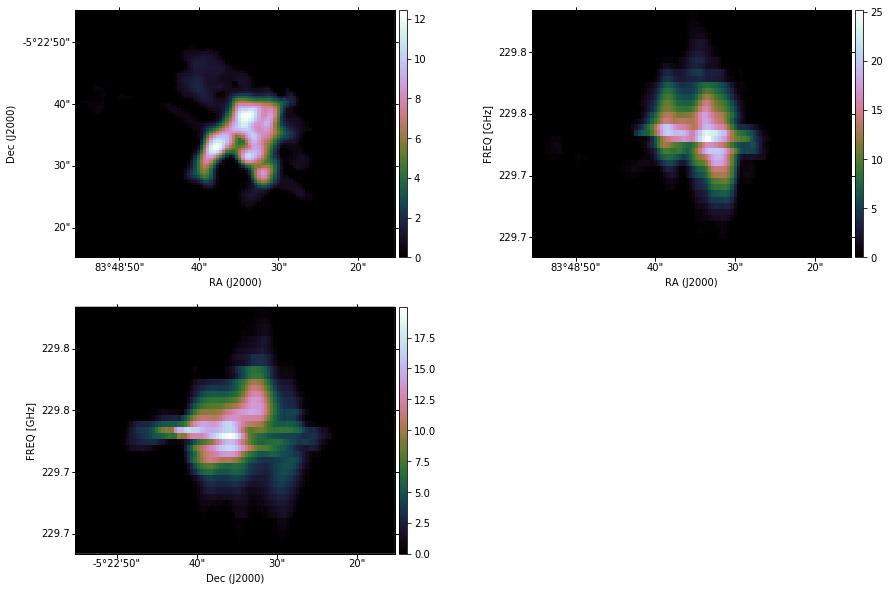

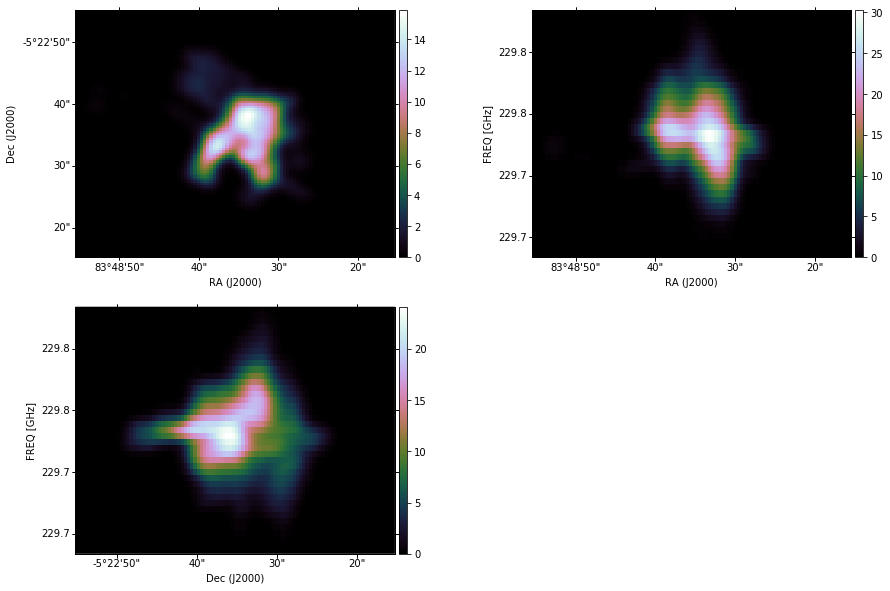

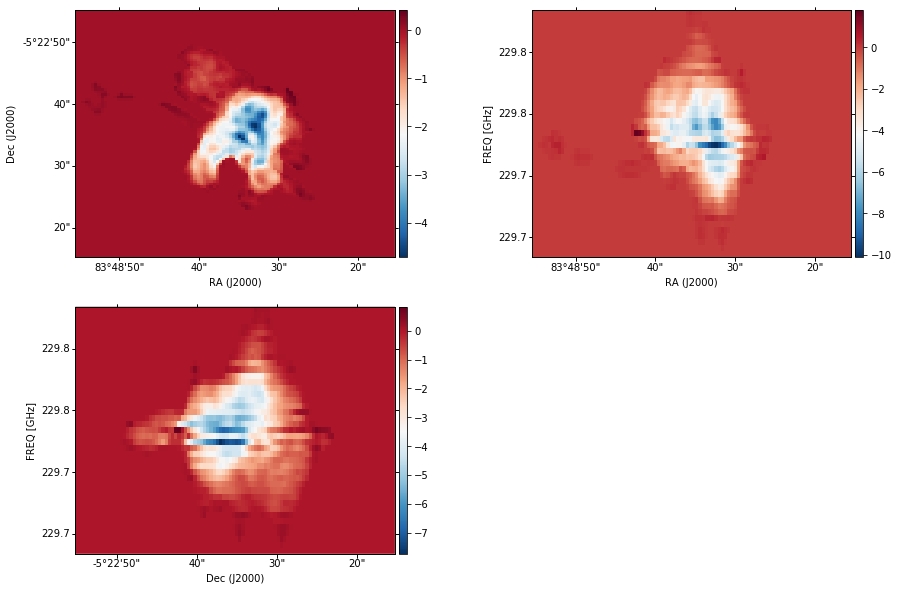

RESIDUAL STATS
RMS of residual: 0.027567495941751997
Inf norm of residual: 0.47003436221792994
Variance of residual: 0.0007416502978021524
Normalized flux addition: 0.3279445943058544
Normalized flux lost: 0.015522192790487518


In [12]:
hdmc.get_residual_stats();

***

In [13]:
hdmc.build_gmr()

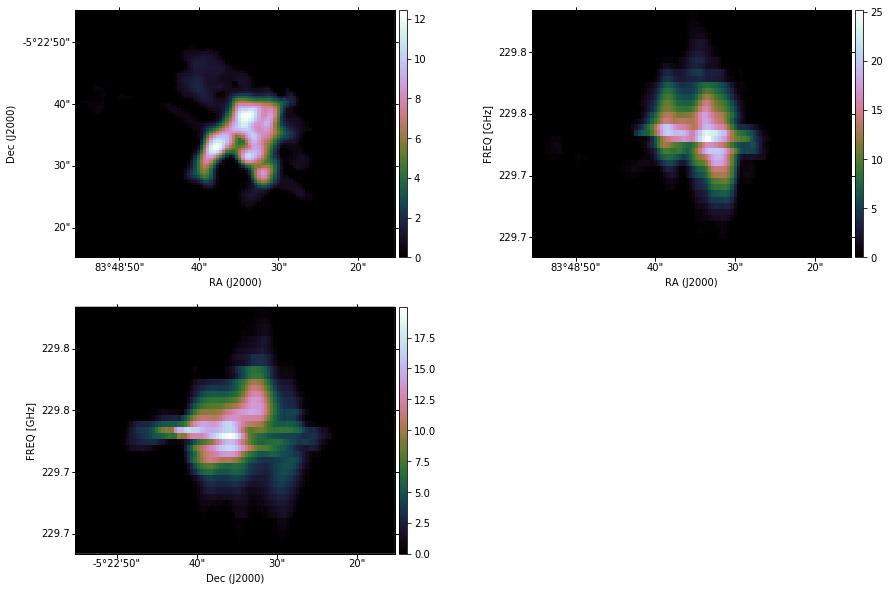

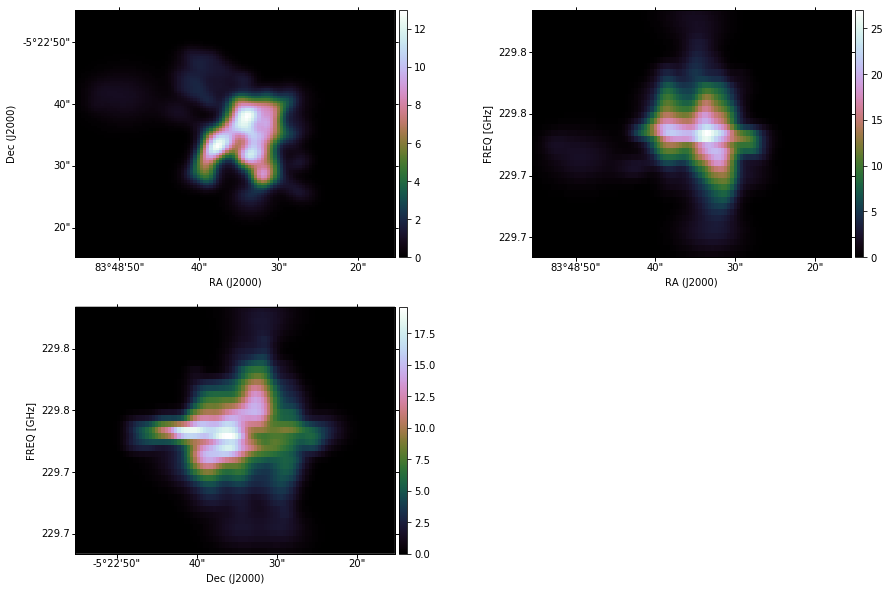

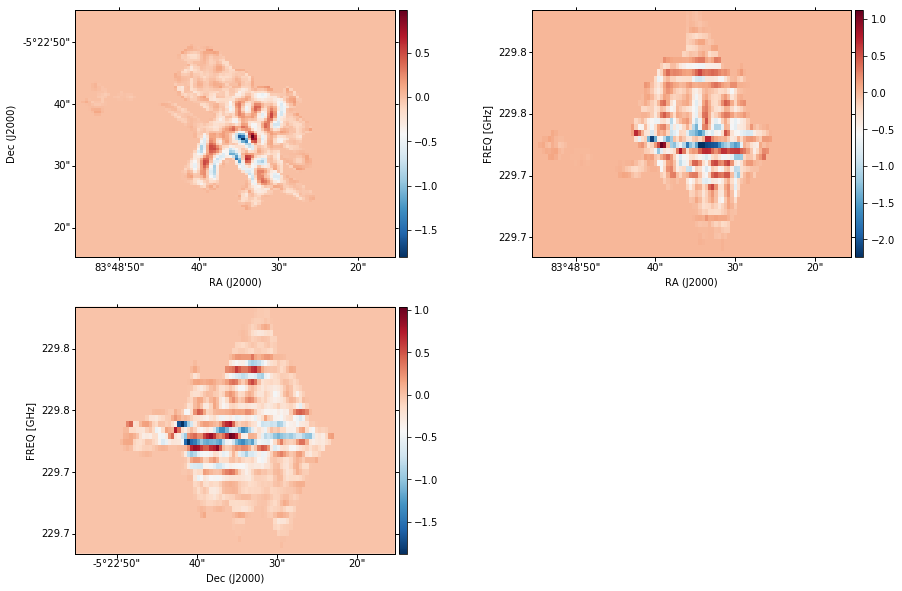

RESIDUAL STATS
RMS of residual: 0.008636562198282679
Inf norm of residual: 0.2564620791689578
Variance of residual: 7.445141911669721e-05
Normalized flux addition: 0.06149108124026307
Normalized flux lost: 0.034295667667530394


In [14]:
hdmc.get_residual_stats(plot=True);

In [15]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 300200.
nfev: 300232
xtol: 1e-07
ftol: 1e-07


In [15]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 2684.4098167419434


In [16]:
w,sig = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

AttributeError: 'HDMClouds' object has no attribute 'get_params_mapped'

***